In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

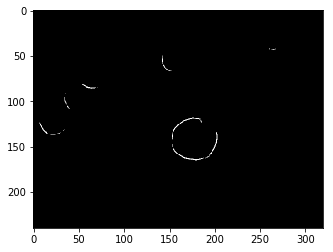

In [3]:
im = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp")
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(imgray,cmap='gray')

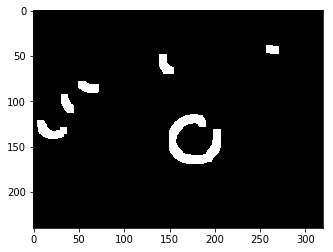

In [4]:
test_im = imgray/255

test_im[test_im>0.5]=1
test_im[test_im<0.5]=0

kernel = np.ones((8,8),np.uint8)   
#opening = cv2.morphologyEx(test_im, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(test_im, cv2.MORPH_CLOSE, kernel)
img_dilation = cv2.dilate(test_im, kernel, iterations=1)
img_dilation = cv2.normalize(src=img_dilation, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
plt.imshow(img_dilation,cmap='gray')

In [5]:
im2, contours, hierarchy = cv2.findContours(img_dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [6]:
#cv2.drawContours(im, contours, -1, (0,255,0), 3)

In [7]:
#plt.imshow(im,cmap='gray')

In [8]:
'''
x=[]
y=[]
for i in range(0,len(contours)):
    cnt = contours[i]
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    x.append(cx)
    y.append(cy)
print(x)
print(y)
'''

"\nx=[]\ny=[]\nfor i in range(0,len(contours)):\n    cnt = contours[i]\n    M = cv2.moments(cnt)\n    cx = int(M['m10']/M['m00'])\n    cy = int(M['m01']/M['m00'])\n    x.append(cx)\n    y.append(cy)\nprint(x)\nprint(y)\n"

In [9]:
for cnt in contours:
    hull = cv2.convexHull(cnt)
    #cv2.drawContours(im, [hull], -1, (0, 0, 255), 1)

In [10]:
#print(hull)

In [11]:
im2 = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp")

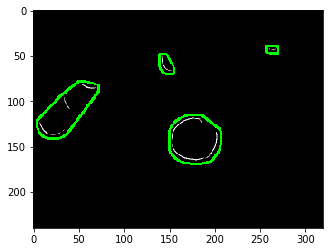

In [57]:
def find_if_close(cnt1,cnt2):
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(0,row1):
        for j in range(0,row2):
            dist = np.linalg.norm(cnt1[i]-cnt2[j])
            if abs(dist) < 30 :
                return True
            elif i==row1-1 and j==row2-1:
                return False

#img = cv2.imread('dspcnt.jpg')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret,thresh = cv2.threshold(gray,127,255,0)
_,contours,hier = cv2.findContours(img_dilation,cv2.RETR_EXTERNAL,2)

LENGTH = len(contours)
status = np.zeros((LENGTH,1))

for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified = []
maximum = int(status.max())+1
for i in range(0,maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        #print(cont)
        hull = cv2.convexHull(cont)
        #print (hull)
        unified.append(hull)

cv2.drawContours(im2,unified,-1,(0,255,0),2)
plt.imshow(im2,cmap='gray')

In [13]:
x=[]
y=[]
for i in range(0,len(unified)):
    cnt = unified[i]
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    x.append(cx)
    y.append(cy)
x=np.array(x)
y=np.array(y)
x=x/10
y=y/10
print(x)
print(y)

[ 3.6 17.7 14.6 26.3]
[11.  14.2  5.9  4.3]


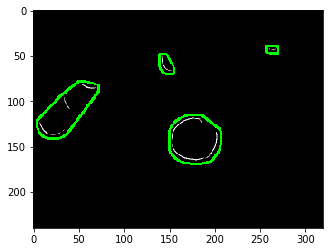

In [14]:
plt.imshow(im2,cmap='gray')

In [60]:
im3 = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp")
#print(im3.shape)
#im3= im3/255

#im3[im3>0.5]=1
#im3[im3<0.5]=0
print(im3.shape)


(240, 320, 3)


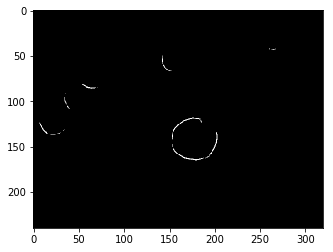

In [61]:
plt.imshow(im3,cmap='gray')

(240, 320, 3)


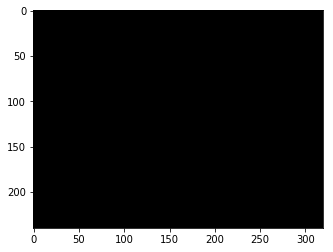

In [62]:
black = np.zeros_like(im3)
print(black.shape)
plt.imshow(black,cmap='gray')

In [33]:
print(len(unified))

4


In [18]:
i=0
odds = 0
for h in unified:
    #hull = cv2.convexHull(cnt)
    print("i",i)
    i+=1
    img = im3.copy()
    black2 = black.copy()

    #--- Here is where I am filling the contour after finding the convex hull ---
    cv2.drawContours(black2, [h], -1, (255, 255, 255), -1)
    
    g2 = cv2.cvtColor(black2, cv2.COLOR_BGR2GRAY)
    r, t2 = cv2.threshold(g2, 127, 255, cv2.THRESH_BINARY)
    #cv2.imshow("t2.jpg", t2)

    masked = cv2.bitwise_and(im3, im3, mask = t2) 
    masked=cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)
    #masked[masked>127]=1
    #masked[masked<127]=0
    M = cv2.moments(h)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cx=cx/10
    cy=cy/10
    height, width = masked.shape[:2]
    ymax = int(height/10)
    xmax = int(width/10)
    masked = cv2.resize(masked,(int(height/10), int(width/10)))
    
    for theta in range (0,360):
        theta = 0.5*theta
        print(theta)
        r=1
        x1=1
        y1=1
        intersects=0        
        #cx=cx/10
        #cy=cy/10
        while(x1<xmax-1 and y1<ymax-1 and x1>-1 and y1>-1):
            x=r*math.cos(math.radians(theta))
            y=r*math.sin(math.radians(theta))
            x1=int(x+cx)
            y1=int(y+cy)
            print(x1,y1)
            if(masked[x1][y1]==1):
                intersects+=1
            print("r",r)
            r+=0.5
        
        r=1
        x1=1
        y1=1
        while(x1>-1 and y1>-1 and x1<xmax-1 and y1<ymax-1):
            x=r*math.cos(math.radians(theta))
            y=r*math.sin(math.radians(theta))
            x1=int(x+cx)
            y1=int(y+cy)
            print(x1,y1)
            if(masked[x1][y1]):
                intersects+=1
            r-=0.5 
            
               
        print("intersects",intersects)   
        if (intersects%2):
            odds+=1
    print("odds",odds)
    cv2.imwrite("masked"+str(i)+".jpg", masked)
    i=i+1

    

i 0


error: /Users/swati/opencv/modules/imgproc/src/color.cpp:10600: error: (-215) depth == CV_8U || depth == CV_16U || depth == CV_32F in function cvtColor


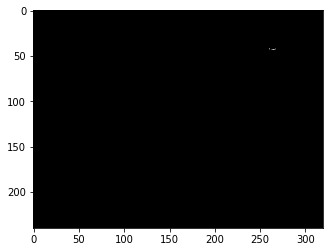

In [68]:
h= unified[3]
img = im3.copy()
black2 = black.copy()

#--- Here is where I am filling the contour after finding the convex hull ---
cv2.drawContours(black2, [h], -1, (255, 255, 255), -1)
#mask = cv2.imread("masked1.jpg")
#plt.imshow(black2,cmap='gray')
#print(mask.shape)
#print(black2)
g2 = cv2.cvtColor(black2, cv2.COLOR_BGR2GRAY)
r, t2 = cv2.threshold(g2, 127, 255, cv2.THRESH_BINARY)
#plt.imshow(t2,cmap='gray')

masked = cv2.bitwise_and(im3, im3, mask = t2) 
plt.imshow(masked,cmap='gray')

In [17]:
print(xmax)
print(masked.shape)

32
(32, 24)


(32, 24, 3)


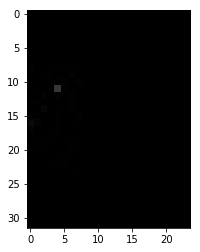

In [39]:
mask = cv2.imread("masked1.jpg")
plt.imshow(mask,cmap='gray')
print(mask.shape)


In [64]:
print(odds)

21


In [32]:
theta = 0.5
r=1
x=r*math.cos(math.radians(theta))
y=r*math.sin(math.radians(theta))
print(cx)
print(cy)
x1=int(x+cx)
y1=int(y+cy)
print(x1,y1)

0.0
0.0
0 0


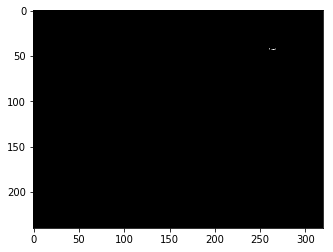

In [22]:
plt.imshow(masked,cmap='gray')

In [47]:
im4  = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp",0)

In [48]:
print(im4.shape)

(240, 320)


In [52]:
height, width = im4.shape[:2]
res = cv2.resize(im4,(int(width/10), int(height/10)))

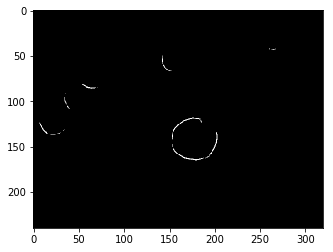

In [53]:
plt.imshow(im4,cmap='gray')

In [69]:
keep_prob=0.8

In [72]:
a3=[1,1,1,1,1,1]
a3 = np.array(a3)

In [73]:
d3=np.random.rand(a3.shape[0])<keep_prob

In [74]:
print(d3)

[ True  True  True False  True False]


In [76]:
a3=np.multiply(a3,d3)

In [77]:
print(a3)

[1 1 1 0 1 0]
